In [41]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime


In [3]:
# loading the data into the dataframe
df = pd.read_csv('ShanghaiPMtrain.csv') 
df = df.fillna(df.mean())
print(df) 

          No  year  month  day  hour  season  PM_Jingan  PM_US Post  \
0          1  2010      1    1     0       4  58.523347   53.640643   
1          2  2010      1    1     1       4  58.523347   53.640643   
2          3  2010      1    1     2       4  58.523347   53.640643   
3          4  2010      1    1     3       4  58.523347   53.640643   
4          5  2010      1    1     4       4  58.523347   53.640643   
...      ...   ...    ...  ...   ...     ...        ...         ...   
43819  43820  2014     12   31    19       4  72.000000   84.000000   
43820  43821  2014     12   31    20       4  70.000000   71.000000   
43821  43822  2014     12   31    21       4  53.000000   42.000000   
43822  43823  2014     12   31    22       4  38.000000   37.000000   
43823  43824  2014     12   31    23       4  25.000000   32.000000   

        PM_Xuhui  DEWP   HUMI    PRES  TEMP cbwd    Iws  precipitation  Iprec  
0      60.280218  -6.0  59.48  1026.1   1.0   cv    1.0            

/tmp/ipykernel_7566/1384185906.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [141]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No             43824 non-null  int64         
 1   year           43824 non-null  int64         
 2   month          43824 non-null  int64         
 3   day            43824 non-null  int64         
 4   hour           43824 non-null  int64         
 5   season         43824 non-null  int64         
 6   PM_Jingan      43824 non-null  float64       
 7   PM_US Post     43824 non-null  float64       
 8   PM_Xuhui       43824 non-null  float64       
 9   DEWP           43824 non-null  float64       
 10  HUMI           43824 non-null  float64       
 11  PRES           43824 non-null  float64       
 12  TEMP           43824 non-null  float64       
 13  cbwd           43812 non-null  object        
 14  Iws            43824 non-null  float64       
 15  precipitation  4382

In [142]:
#viewing few rows from the top
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,myDt,date,PM_average
0,1,2010,1,1,0,4,58.523347,53.640643,60.280218,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,2010-01-01,2010-01-01,57.481403
1,2,2010,1,1,1,4,58.523347,53.640643,60.280218,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,2010-01-01,2010-01-01,57.481403
2,3,2010,1,1,2,4,58.523347,53.640643,60.280218,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,2010-01-01,2010-01-01,57.481403
3,4,2010,1,1,3,4,58.523347,53.640643,60.280218,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0,2010-01-01,2010-01-01,57.481403
4,5,2010,1,1,4,4,58.523347,53.640643,60.280218,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0,2010-01-01,2010-01-01,57.481403


In [143]:
df['PM_average'] = df[['PM_Jingan','PM_US Post', 'PM_Xuhui']].mean(axis=1)

In [144]:
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,myDt,date,PM_average
0,1,2010,1,1,0,4,58.523347,53.640643,60.280218,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,2010-01-01,2010-1-1,57.481403
1,2,2010,1,1,1,4,58.523347,53.640643,60.280218,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,2010-01-01,2010-1-1,57.481403
2,3,2010,1,1,2,4,58.523347,53.640643,60.280218,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,2010-01-01,2010-1-1,57.481403
3,4,2010,1,1,3,4,58.523347,53.640643,60.280218,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0,2010-01-01,2010-1-1,57.481403
4,5,2010,1,1,4,4,58.523347,53.640643,60.280218,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0,2010-01-01,2010-1-1,57.481403


In [145]:
df['date']=pd.to_datetime(df[['year','month','day']])
df.date

0       2010-01-01
1       2010-01-01
2       2010-01-01
3       2010-01-01
4       2010-01-01
           ...    
43819   2014-12-31
43820   2014-12-31
43821   2014-12-31
43822   2014-12-31
43823   2014-12-31
Name: date, Length: 43824, dtype: datetime64[ns]

In [146]:

train_dates = pd.to_datetime(df['date'])
print(train_dates)

0       2010-01-01
1       2010-01-01
2       2010-01-01
3       2010-01-01
4       2010-01-01
           ...    
43819   2014-12-31
43820   2014-12-31
43821   2014-12-31
43822   2014-12-31
43823   2014-12-31
Name: date, Length: 43824, dtype: datetime64[ns]


In [148]:
cols = list(df)[6:9]
print(cols)

['PM_Jingan', 'PM_US Post', 'PM_Xuhui']


In [149]:
df_for_training = df[cols].astype(float)
print(df_for_training)

       PM_Jingan  PM_US Post   PM_Xuhui
0      58.523347   53.640643  60.280218
1      58.523347   53.640643  60.280218
2      58.523347   53.640643  60.280218
3      58.523347   53.640643  60.280218
4      58.523347   53.640643  60.280218
...          ...         ...        ...
43819  72.000000   84.000000  75.000000
43820  70.000000   71.000000  75.000000
43821  53.000000   42.000000  58.000000
43822  38.000000   37.000000  40.000000
43823  25.000000   32.000000  32.000000

[43824 rows x 3 columns]


In [150]:
scalar = StandardScaler()
scalar = scalar.fit(df_for_training)
df_for_training_scaled = scalar.transform(df_for_training)

In [151]:
#Meat of the problem 
trainX = []
trainY = []

n_future = 1 #want to predict for No. of days in the future
n_past = 14 #want to predict using the No. of days in the past 

for i in range (n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])


In [152]:
trainX , trainY = np.array(trainX), np.array(trainY)

In [153]:
print('trainX Shape>>',trainX.shape)
print('trainY Shape>>',trainY.shape)

trainX Shape>> (43810, 14, 3)
trainY Shape>> (43810, 1)


In [154]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape = (trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
2465/2465 [==============================] - 14s 5ms/step - loss: 0.2921 - val_loss: 0.1957
Epoch 2/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.2055 - val_loss: 0.2160
Epoch 3/10
2465/2465 [==============================] - 13s 5ms/step - loss: 0.1574 - val_loss: 0.2046
Epoch 4/10
2465/2465 [==============================] - 13s 5ms/step - loss: 0.1381 - val_loss: 0.1722
Epoch 5/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.1289 - val_loss: 0.1588
Epoch 6/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.1331 - val_loss: 0.1682
Epoch 7/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.1352 - val_loss: 0.1536
Epoch 8/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.1241 - val_loss: 0.1589
Epoch 9/10
2465/2465 [==============================] - 12s 5ms/step - loss: 0.1237 - val_loss: 0.1644
Epoch 10/10
2465/2465 [==============================] - 12s 5ms/step - l

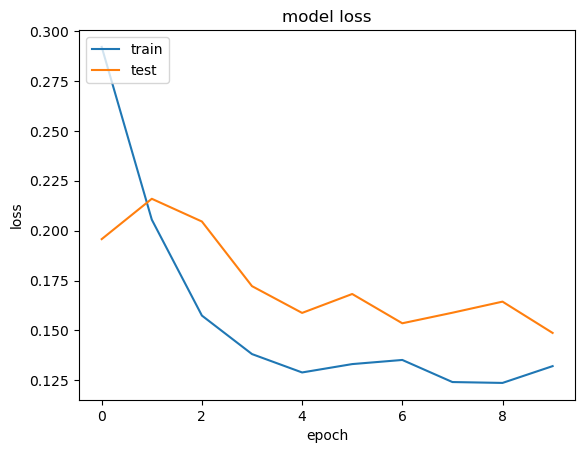

In [156]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [168]:
n_future = 90
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()



In [169]:
forecast = model.predict(trainX[-n_future:])

3/3 [==============================] - 0s 2ms/step


In [170]:
forecast.shape

(90, 1)

In [171]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1) #not a good way of doing this need a better idea
y_pred_future = scalar.inverse_transform(forecast_copies)[:,0]

In [172]:
#Convert Timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'PM2.5':y_pred_future})
df_forecast['date']= pd.to_datetime(df_forecast['date'])
print(df_forecast)

         date      PM2.5
0  2014-12-31  29.150646
1  2015-01-01  35.165562
2  2015-01-02  37.468533
3  2015-01-03  43.750744
4  2015-01-04  47.155079
..        ...        ...
85 2015-03-26  65.511711
86 2015-03-27  76.954849
87 2015-03-28  66.910278
88 2015-03-29  43.961670
89 2015-03-30  37.540089

[90 rows x 2 columns]


In [173]:
original = df[['date', 'PM_Jingan']]
original['date']= pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2013-12-31']

/tmp/ipykernel_7566/186051022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']= pd.to_datetime(original['date'])


/home/karun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/karun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='PM_Jingan'>

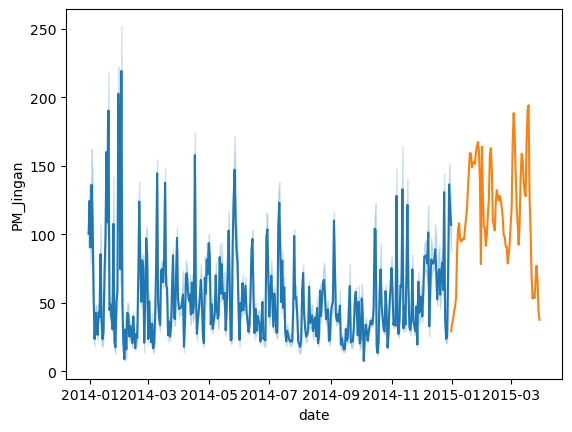

In [174]:
sns.lineplot(original['date'], original['PM_Jingan'])
sns.lineplot(df_forecast['date'], df_forecast['PM2.5'])